cost at initial theta =  [[ 0.69314718]]  and Gradient =  [[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]
cost at test_theta =  [[ 0.21833019]]  and Gradient =  [[ 0.04290299]
 [ 2.56623412]
 [ 2.64679737]] 

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


After optmization using Nelder-Mead Algorithm , Optimized parameters are  [-25.16130062   0.20623142   0.20147143]


Value of Cost function at Optimized Parameters 0.20349770159

Admitted Probability is  0.776291590411
Value predicted for opt_theta and 45,85  1


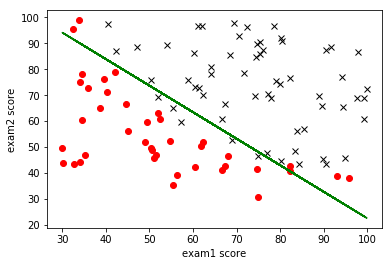

Accuracy of our model is  89.0 %


In [9]:
import numpy as np
import matplotlib.pyplot as plt
#to calculate power of (e) , log 
import math
#for optimization of cost function by optimizing parameters
from scipy import optimize
from scipy.optimize import minimize

#sigmoid function implementation
def sigmoid_function(z):
          return (1/(1 + np.exp(-z)))

#predict value for a given theta and a value not present in training data
def predict(theta ,f1,f2):
    hypo_value = sigmoid_function(theta[1]*f1 + theta[2]*f2 +theta[0])  
    if hypo_value >= 0.5:
        print("\nAdmitted Probability is ",hypo_value)
        return 1 
    else:
        print("\nNot Admitted Probability is ",hypo_value)
        return 0


#calculate cost for a given theta and fix training set
def Cost_function(theta,X,m,result):
    theta = theta.reshape(3,1)
    temp  = result.T*(np.log(sigmoid_function(X*theta)))
    temp2 = np.dot((1-result).T,np.log(1 - sigmoid_function(np.dot(X,theta))))
    
    cost = temp + temp2
    cost = -(cost/m)
    return cost

#calculate gradient for a given theta and a fix training set
def Gradient(theta,X,m,result):
    
    gradient = np.dot(X.T,(sigmoid_function(X*theta) - result))
    gradient = (gradient/m)
    
    return (gradient)

#exam1 stores score of a student in exam1
#exam2 stores score of a student in exam2
#result stores whether a student is admitted or not

exam1 = []
exam2 = []
result = []
result1 = []

#load data from the file
exam1,exam2,result = np.loadtxt("ex2data1.txt",unpack = True , delimiter = ",")

result = np.array(result).reshape(len(exam1),1)
result1 = result
#m store number of trainig set
m = len(exam1)

#create matrix X which stores features
ones = np.ones(len(exam1))
Xt = np.matrix([ones,exam1,exam2])
X = Xt.transpose()
theta = np.zeros((3,1))
theta1 = np.zeros((X.shape[1],1))

test_theta = np.array([-24,0.2,0.2]).reshape(3,1)

print("cost at initial theta = ",Cost_function(theta,X,m,result)," and Gradient = ",Gradient(theta,X,m,result))
print("cost at test_theta = ",Cost_function(test_theta,X,m,result)," and Gradient = ",Gradient(test_theta,X,m,result),"\n")


#optimize the parameters using scipy.optimize.minimize and scipy.optimize.fmin
opt = optimize.fmin(Cost_function,theta ,args=(X, m, result), maxiter=400, full_output=True,disp = True)
opt_theta = opt[0]
opt_value = opt[1]
print("\n\nAfter optmization using Nelder-Mead Algorithm , Optimized parameters are ",opt_theta)
print("\n\nValue of Cost function at Optimized Parameters",opt_value)

#predict value 
print("Value predicted for opt_theta and 45,85 ",predict(opt_theta,45,85))

#plot Decision Boundary
x2 = []
#plot data-set
for i in range(len(exam1)):
    if result[i] == 0:
        plt.plot(exam1[i],exam2[i],'ro',color = "red")
    else:
        plt.plot(exam1[i],exam2[i],'rx',color = "black")
    
#plot exam2 value predict by hypothesis for optimized theta for each exam1 value
for i in range(m):
    x2.append(float(-(opt_theta[1]*exam1[i] + opt_theta[0])/opt_theta[2]))

plt.plot(exam1,x2,color = "green")
plt.xlabel("exam1 score")
plt.ylabel("exam2 score")

plt.show()

#calculate accuracy of our model
correct = 0

for i in range(m):
    hypo_value = sigmoid_function(opt_theta[1]*exam1[i] + opt_theta[2]*exam2[i] + opt_theta[0])
    if hypo_value >= 0.5 and result[i] == 1:
        correct = correct + 1
    if hypo_value <0.5 and result[i] == 0:
        correct = correct + 1

correct = (correct*100)/m
print("Accuracy of our model is ",correct,"%")